# Proyek Pengembangan ML: [Image Classification]
- **Nama:** [Salsabila Rizka Maulidina]
- **Email:** [a004xbm448@devacademy.id atau salsaajadehhh@gmail.com]
- **ID Dicoding:** [a004xbm448]

# **1. Import Library**

The first step in the modeling process is the import library where we load the libraries needed for data analysis, preprocessing, model building, and evaluation model.

In [ ]:
import os                                          # Provides functions for interacting with the operating system
import pandas as pd                                  # Library for data manipulation and analysis
import numpy as np                                   # Library for numerical computations, especially with arrays
import matplotlib.pyplot as plt                      # Library for creating static, interactive, and animated visualizations in Python
import plotly.express as px                          # Library for creating interactive plots and visualizations
import joblib                                        # Library for serializing and deserializing Python objects
from collections import Counter                      # A container that keeps track of how many times each element occurs
import matplotlib.pyplot as plt                      # (Redundant import, already imported above)
import tensorflow as tf                              # Open-source machine learning framework
from tensorflow import keras                           # TensorFlow's high-level API for building and training deep learning models
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Functions for evaluating model performance
from tensorflow.keras.preprocessing import image     # Module for image loading and preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tool for generating batches of tensor image data with real-time data augmentation
from tensorflow.keras import Sequential, layers, models, optimizers # Building blocks for creating neural network models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Common neural network layers
from keras.layers import TFSMLayer                      # Layer for integrating TensorFlow Serving models into Keras
from tensorflow.keras.models import Model             # Class for defining more complex, functional API models
from tensorflow.keras.optimizers import Adam            # Popular optimization algorithm for training neural networks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Callbacks to control training process
from tensorflow.keras import regularizers              # Module for applying regularization techniques to layers
from sklearn.preprocessing import LabelEncoder        # Utility to convert categorical labels into numerical form

# **2. Data Preparation**

## Data Loading

In [2]:
# Path folder data
dir_path = "C:/Users/Windows 10/Studpen_PengembanganML/Submission_2/data"

In [3]:
# Inisialization
paths = []
classes = []

# Loop into subfolder so subfolder will become class name
for class_folder in os.listdir(dir_path):
    class_path = os.path.join(dir_path, class_folder)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_path, img_name)
                paths.append(img_path)
                classes.append(class_folder)

In [4]:
# Take a list of unique class names and mapping them to numeric labels
class_names = sorted(set(classes))
label_mapping = {name: i for i, name in enumerate(class_names)}

In [5]:
# Make dataframe
df = pd.DataFrame({
    'path': paths,
    'class': classes,
})
df['label'] = df['class'].map(label_mapping).astype(str)

In [6]:
# Print the result of the class name
print("Class:", class_names)

Class: ['Blot-Gel', 'FACS', 'Histopathology', 'Macroscopy', 'Microscopy', 'Non-scientific']


In [7]:
# Print the result of the total sample
print(f"Total Samples: {len(df)}")

Total Samples: 19105


In [8]:
# Display the dataset
df

,path,class,label
0,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Blot-Gel,0
1,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Blot-Gel,0
2,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Blot-Gel,0
3,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Blot-Gel,0
4,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Blot-Gel,0
...,...,...,...
19100,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Non-scientific,5
19101,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Non-scientific,5
19102,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Non-scientific,5
19103,C:/Users/Windows 10/Studpen_PengembanganML/Sub...,Non-scientific,5


It can be seen that the dataset has 19105 rows and 3 columns with 6 class including 'Blot-Gel', 'FACS', 'Histopathology', 'Macroscopy', 'Microscopy', 'Non-scientific'

## Data Preprocessing

#### Check of the dataset
Before we go further, the dataset is shuffled and checked first to know the info in it. The main purpose of shuffling the data in this process is to avoid bias and to have an even distribution of data per batch.

In [9]:
# shuffling the data
shuffled_df = df.sample(frac=1).reset_index(drop=True)
df = shuffled_df

In [10]:
# Display the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    19105 non-null  object
 1   class   19105 non-null  object
 2   label   19105 non-null  object
dtypes: object(3)
memory usage: 447.9+ KB


In [11]:
# Check of the data dimension
df.ndim

2

From here, it can be seen that the data types are still all object types in label colum and the data has 2 dimensions

#### Encoding
Here we will do encoding to change the data type of the label column that is still an object after that we will check again to make sure

In [12]:
# Encode categorical labels into numeric values (e.g., 'cat' → 0, 'dog' → 1) using LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [13]:
# Check the data type again
df.dtypes

path     object
class    object
label     int32
dtype: object

It can be seen that the data types of the label column have became no object anymore, so we can continue to the next step

#### Spllitting
We will split the dataset into 90% train set and 10 % test data, then make sure that each class is evenly represented in both sets

In [14]:
# Split the dataset into training and testing subsets
train_df, test_df = train_test_split(
    df,                          
    test_size=0.1,               
    stratify=df['label'],        # Ensure the split maintains the same class distribution as the original dataset
    random_state=42              # Set a fixed seed for reproducibility (same split every time)
)

In [15]:
# Check length of each set
print("The length of training dataset:", len(train_df))
print("The length of testing dataset:", len(test_df))

The length of training dataset: 17194
The length of testing dataset: 1911


After splitting data, the label column has a numeric data type (e.g. integer) because of encoding process, but the model later requires labels in string format. So, we need to convert the label column to string type

In [16]:
# Change the label column to string after splitting
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

In [17]:
# Check the data type again
df.dtypes

path     object
class    object
label     int32
dtype: object

We can see that the data type is as desired, then we can proceed to the next step.

# **3. Modelling**

## Data Augmentation
Fhis process helps the image classification model to learn better, not easily overfit, and perform more accurately on new data. The original dataset has a non-uniform resolution so ImageDataGenerator & resize to 224x224

In [18]:
# Define the size to which all images will be resized and the number of images per batch
image_size = (224, 224)
batch_size = 25

In [19]:
# Define preprocessing and augmentation settings for training data
augment_params = {
    "rotation_range": 10,             # Randomly rotate images within a range of 10 degrees
    "horizontal_flip": True,          # Randomly flip images horizontally
    "rescale": 1.0 / 255,             # Normalize pixel values to the range [0, 1]
    "width_shift_range": 0.2,         # Randomly shift images horizontally by up to 20% of the width
    "height_shift_range": 0.2,        # Randomly shift images vertically by up to 20% of the height
    "zoom_range": 0.2,                # Randomly zoom images by up to 20%
    "shear_range": 0.2,               # Apply random shearing transformations up to 20%
    "validation_split": 0.2,          # Reserve 20% of the data for validation
    "brightness_range": [0.8, 1.2]    # Randomly adjust image brightness within this range
}

# Initialize data generator for training (with augmentation)
train_generator_config = ImageDataGenerator(**augment_params)

# Initialize data generator for validation (only rescaling, no augmentation)
validation_generator_config = ImageDataGenerator(rescale=1.0 / 255)

In [20]:
# Set up the training data loader using the augmentation configuration
train_loader = train_generator_config.flow_from_dataframe(
    dataframe=train_df,         # Use the DataFrame 'train_df' which contains image paths and labels
    x_col="path",               # Column name in the DataFrame that contains the image file paths
    y_col="label",              # Column name in the DataFrame that contains the corresponding labels
    target_size=image_size,     # Resize all images to the specified target size (e.g., (224, 224))
    batch_size=batch_size,      # Number of images to load in each batch
    class_mode="sparse",        # Use sparse labels (integer encoded, useful for sparse_categorical_crossentropy loss)
    fill_mode="nearest",        # Fill in missing pixels after transformations using the nearest pixel value
    dtype=None                  # Data type for the images (None means default float32 after rescaling)
)

Found 17194 validated image filenames belonging to 6 classes.


In [21]:
# Create a validation/test data loader without augmentation
validation_loader = validation_generator_config.flow_from_dataframe(
    dataframe=test_df,          # Use the DataFrame 'test_df' which contains image paths and labels for validation or testing
    x_col="path",               # Column in the DataFrame that has the image file paths
    y_col="label",              # Column in the DataFrame that contains the corresponding labels
    target_size=image_size,     # Resize all images to the specified size (e.g., (224, 224))
    batch_size=batch_size,      # Number of images to load per batch
    class_mode="sparse",        # Use sparse labels (integers), suitable for sparse categorical crossentropy loss
    shuffle=False,              # Do NOT shuffle the data (important for validation/testing to maintain order)
    fill_mode="nearest",        # Use nearest pixel values to fill any empty areas created during resizing
    dtype=None                  # Data type for images (None means use default float32 after rescaling)
)

Found 1911 validated image filenames belonging to 6 classes.


The output above shows that the number of image filenames in the training data is 17194 valid image files and in the validation/test data there are 1911 valid image files.

## Define the Model
Then, define the architecture of the CNN model for the image classification task where it consists of successive layers that are used. We weill use model Sequential, Conv2D, and MaxPooling2D

In [22]:
# Define the architecture for the CNN model
cnn_model = Sequential()

# First convolutional layer
cnn_model.add(Conv2D(filters=32,         # 32 filters
                     kernel_size=3,      # 3x3 kernel size
                     activation='relu',  # ReLU activation
                     input_shape=(224, 224, 3)))  # Input shape: 224x224 RGB images (3 channels) 

# First max pooling layer: reduces spatial dimensions by taking max over 2x2 regions
cnn_model.add(MaxPooling2D(pool_size=2))   

# Second convolutional layer
cnn_model.add(Conv2D(filters=64,         # 64 filters
                     kernel_size=3,      # 3x3 kernel size
                     activation='relu')) # ReLU activation

# Second max pooling layer
cnn_model.add(MaxPooling2D(pool_size=2))

# Third convolutional layer
cnn_model.add(Conv2D(filters=128,         # 128 filters 
                     kernel_size=3,       # 3x3 kernel size
                     activation='relu'))  # ReLU activation

# Third max pooling layer
cnn_model.add(MaxPooling2D(pool_size=2))

# Flatten and Dense Layers
cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dropout(rate=0.5))

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dropout(rate=0.5))

# Output layer for classification
cnn_model.add(Dense(units=len(class_names), activation='softmax'))

# Display the model architecture
cnn_model.summary()

C:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,661,830 (170.37 MB)

 Trainable params: 44,661,830 (170.37 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping
This process is to prevent overfitting by stopping automatic training when validation performance does not improve.

In [23]:
# Set up early stopping to prevent overfitting
stop_early = EarlyStopping(
    monitor='val_loss',             # Monitor the validation loss to decide when to stop training
    patience=3,                     # Stop training if the monitored metric doesn't improve for 3 consecutive epochs
    mode='auto',                    # Automatically decide whether to minimize or maximize the monitored value
    restore_best_weights=True,     # After stopping, restore the model weights from the epoch with the best val_loss
    baseline=None,                 # No specific baseline value; relies solely on improvement of val_loss
    start_from_epoch=3             # Only start checking for early stopping after 3 epochs
)

## Reduce Learning Rate
It is used to reduce the learning rate of the optimizer during training when the performance on the validation data (val_loss) does not improve.

In [24]:
# Reduce LR when validation loss stops improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',     # Track validation loss to decide when to reduce LR
    factor=0.2,             # Reduce LR by 80%
    patience=3,             # Wait for 3 epochs with no improvement before reducing
    min_lr=0.001,           # Minimum LR limit, don't reduce it
    mode='auto'             # Auto choose 'min' or 'max' mode
)

## Model Compile
This process to prepares the CNN model for training by using the Adam optimizer with a learning rate of 0.001, Using sparse categorical crossentropy loss (for integer-labeled multi-class classification), and tracking accuracy as the evaluation metric during training and validation

In [25]:
# Compile the CNN model with optimizer, loss function, and evaluation metric
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),           
    loss='sparse_categorical_crossentropy',         
    metrics=['accuracy']                           
)

## Training Model
This process starts the training process for the CNN model using augmented training data and clean validation data. It will train for up to 20 epochs, but might stop early if early_stopping is triggered. The reduce_lr callback helps fine-tune the learning rate if the model’s performance plateaus.

In [26]:
# Start training the model with validation, early stopping, and callbacks
history = cnn_model.fit(
    train_loader,
    validation_data = validation_loader,
    epochs = 20,
    callbacks = [stop_early, reduce_lr]
)

C:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
688/688 ━━━━━━━━━━━━━━━━━━━━ 746s 1s/step - accuracy: 0.6677 - loss: 1.0609 - val_accuracy: 0.8791 - val_loss: 0.3608 - learning_rate: 0.0010
Epoch 2/20
688/688 ━━━━━━━━━━━━━━━━━━━━ 788s 1s/step - accuracy: 0.8711 - loss: 0.4137 - val_accuracy: 0.9016 - val_loss: 0.2936 - learning_rate: 0.0010
Epoch 3/20
688/688 ━━━━━━━━━━━━━━━━━━━━ 781s 1s/step - accuracy: 0.8900 - loss: 0.3448 - val_accuracy: 0.8948 - val_loss: 0.3442 - learning_rate: 0.0010
Epoch 4/20
688/688 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.8942 - loss: 0.3242 - val_accuracy: 0.9205 - val_loss: 0.2500 - learning_rate: 0.0010
Epoch 5/20
688/688 ━━━━━━━━━━━━━━━━━━━━ 757s 1s/step - accuracy: 0.9012 - loss: 0.3040 - val_accuracy: 0.9210 - val_loss: 0.2598 - learning_rate: 0.0010
Epoch 6/20
688/688 ━━━━━━━━━━━━━━━━━━━━ 718s 1s/step - accuracy: 0.9115 - loss: 0.2853 - val_accuracy: 0.9199 - val_loss: 0.2333 - learning_rate: 0.0010
Epoch 7/20
688/688 ━━━━━━━━━━━━━━━━━━━━ 706s 1s/step - accuracy: 0.9142 - loss: 0.

# **4. Evaluation and Visualization**

## Evaluation
In the first place, we need to evaluate the performance of the each data. It prints both the loss and the accuracy as percentages

In [27]:
# Evaluate the model performance on the validation and training set
val_loss, val_acc = cnn_model.evaluate(validation_loader)
train_loss, train_acc = cnn_model.evaluate(train_loader)

# Display the evaluation results
print(f"Validation Loss: {val_loss * 100:.2f}%")
print(f"Validation Accuracy: {val_acc * 100:.2f}%\n")
print(f"Training Loss: {train_loss * 100:.2f}%")
print(f"Training Accuracy: {train_acc * 100:.2f}%")

77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.9626 - loss: 0.1100
688/688 ━━━━━━━━━━━━━━━━━━━━ 331s 482ms/step - accuracy: 0.9550 - loss: 0.1324
Validation Loss: 12.08%
Validation Accuracy: 95.87%

Training Loss: 13.26%
Training Accuracy: 95.55%


It can be seen that the model has 95.87% accuracy on the validation/testing set and 95.55% accuracy on the training set. Next, before going to classification report, we need to prepares the validation data loader, gets predicted class labels from the model, and retrieves the true labels.

In [28]:
# Ensure the validation loader is in its initial state
validation_loader.reset()

# Run predictions on the validation set
predicted_labels = np.argmax(cnn_model.predict(validation_loader), axis=1)

# Ground truth labels
true_labels = validation_loader.classes

77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 217ms/step


In [29]:
# Map numerical labels back to their original class names
label_names = [name for name in class_names]

# Evaluate prediction accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Accuracy Score: 95.87%


It can be seen that the value of manually evaluating the model performance for predicting that the model does match the original label is 95.87%. This can be useful for calculating the next matrix

In [30]:
# Display a detailed classification report
print(classification_report(
    true_labels, 
    predicted_labels,
    target_names=label_names, 
    digits=2   # Round metrics to 2 decimal places
))

                precision    recall  f1-score   support

      Blot-Gel       0.96      0.93      0.94       188
          FACS       0.96      0.98      0.97       107
Histopathology       0.98      0.99      0.98       518
    Macroscopy       0.97      0.93      0.95       446
    Microscopy       0.80      0.87      0.83       151
Non-scientific       0.97      0.98      0.98       501

      accuracy                           0.96      1911
     macro avg       0.94      0.95      0.94      1911
  weighted avg       0.96      0.96      0.96      1911



It can be seen that The best class ever:
- Histopathology: almost perfect because it almost has recall value 1.00
- Non-scientific: also very good
Somewhat difficult class:
- Microscopy: the lowest precision and recall (still okay, 0.86 and 0.79).
From here, we can Understand the balance of performance between classes.

## Plotting Train and Validation Loss
The purpose is to visualize the performance of the machine learning model during the training process in the form of a graph. By looking at these graphs, we can understand how the model learns over time, whether overfitting is occurring

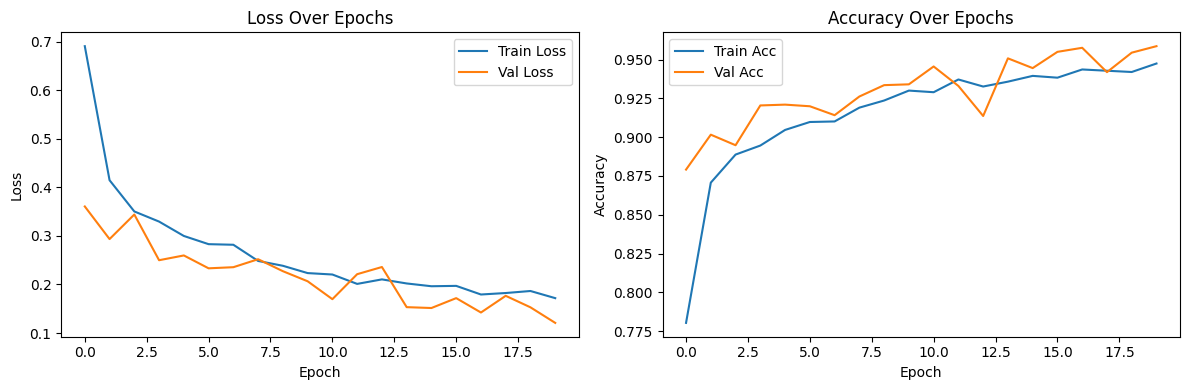

In [31]:
# Create a figure to visualize training history
fig = plt.figure(figsize=(12, 4))

# Plot Loss over epochs
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.set_title('Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot Accuracy over epochs
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], label='Train Acc')
ax2.plot(history.history['val_accuracy'], label='Val Acc')
ax2.set_title('Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

It can be seen that some aspects of the graph above can be interpreted as follows:
- Loss: The graph decreases consistently, meaning that it is not overfitting.
- Accuracy: Graph rises fast, high & stable, this means val acc is very good
- Train-Val Gap: The value is very small, even the val is higher, which means the model is very good.

Overall, this model performs well so it is ready to be used or tested further.

# **5. Model conversion**

## Into TensorFlow SavedModel format
First, we will save model into SavedModel which is a standard TensorFlow format that can be used for deployment on a server or cloud.

In [54]:
# Ensure the directories exist before saving files
saved_model_path = r"C:\Users\Windows 10\Studpen_PengembanganML\Submission_2\saved_model"
tflite_dir = r"C:\Users\Windows 10\Studpen_PengembanganML\Submission_2\tflite"
tfjs_model_path = r"C:\Users\Windows 10\Studpen_PengembanganML\Submission_2\tfjs_model"

In [55]:
# Create the directories if they don't exist
os.makedirs(saved_model_path, exist_ok=True)
os.makedirs(tflite_dir, exist_ok=True)
os.makedirs(tfjs_model_path, exist_ok=True)

In [57]:
# Export the model in the SavedModel format
cnn_model.export(saved_model_path)

INFO:tensorflow:Assets written to: C:\Users\Windows 10\Studpen_PengembanganML\Submission_2\saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\Windows 10\Studpen_PengembanganML\Submission_2\saved_model\assets


Saved artifact at 'C:\Users\Windows 10\Studpen_PengembanganML\Submission_2\saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1737120854992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737120853760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737044550656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737121401312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737121409760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737121410464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737121603728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737121600208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737121610064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1737121608304: TensorSpec(shape=(), dtype=tf.resour

## Into TensorFlow Lite format

In [58]:
# Convert the model to TF-Lite format
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

with open(os.path.join(tflite_dir, "model.tflite"), "wb") as f:
    f.write(tflite_model)

# Save label.txt if needed 
with open(os.path.join(tflite_dir, "label.txt"), "w") as f:
    for label in class_names:
        f.write(f"{label}\n")

## Into TFJS
TFJS is a format for TensorFlow.js that allows models to be run in browsers and JavaScript-based applications. 

However, here, we will apply the code to google colab because it is more flexible. **I use Jupyter notebook to train the model. Previously, I tried in the local cmd to install tensorflowjs. However, it takes a very long time and stops in the middle of the process, so I converted it to TFJS with google colab.**

Starting from downloading the SavedModel zip file, then uploading it to google colab, converting it to TFJS, then downloading and unzipping those file. For more details, you can see in the screenshoot image or look into the link bellow **as proof that I have converted TFJS independently**

### 🔗 Screenshoot Process Convert to TFJS 
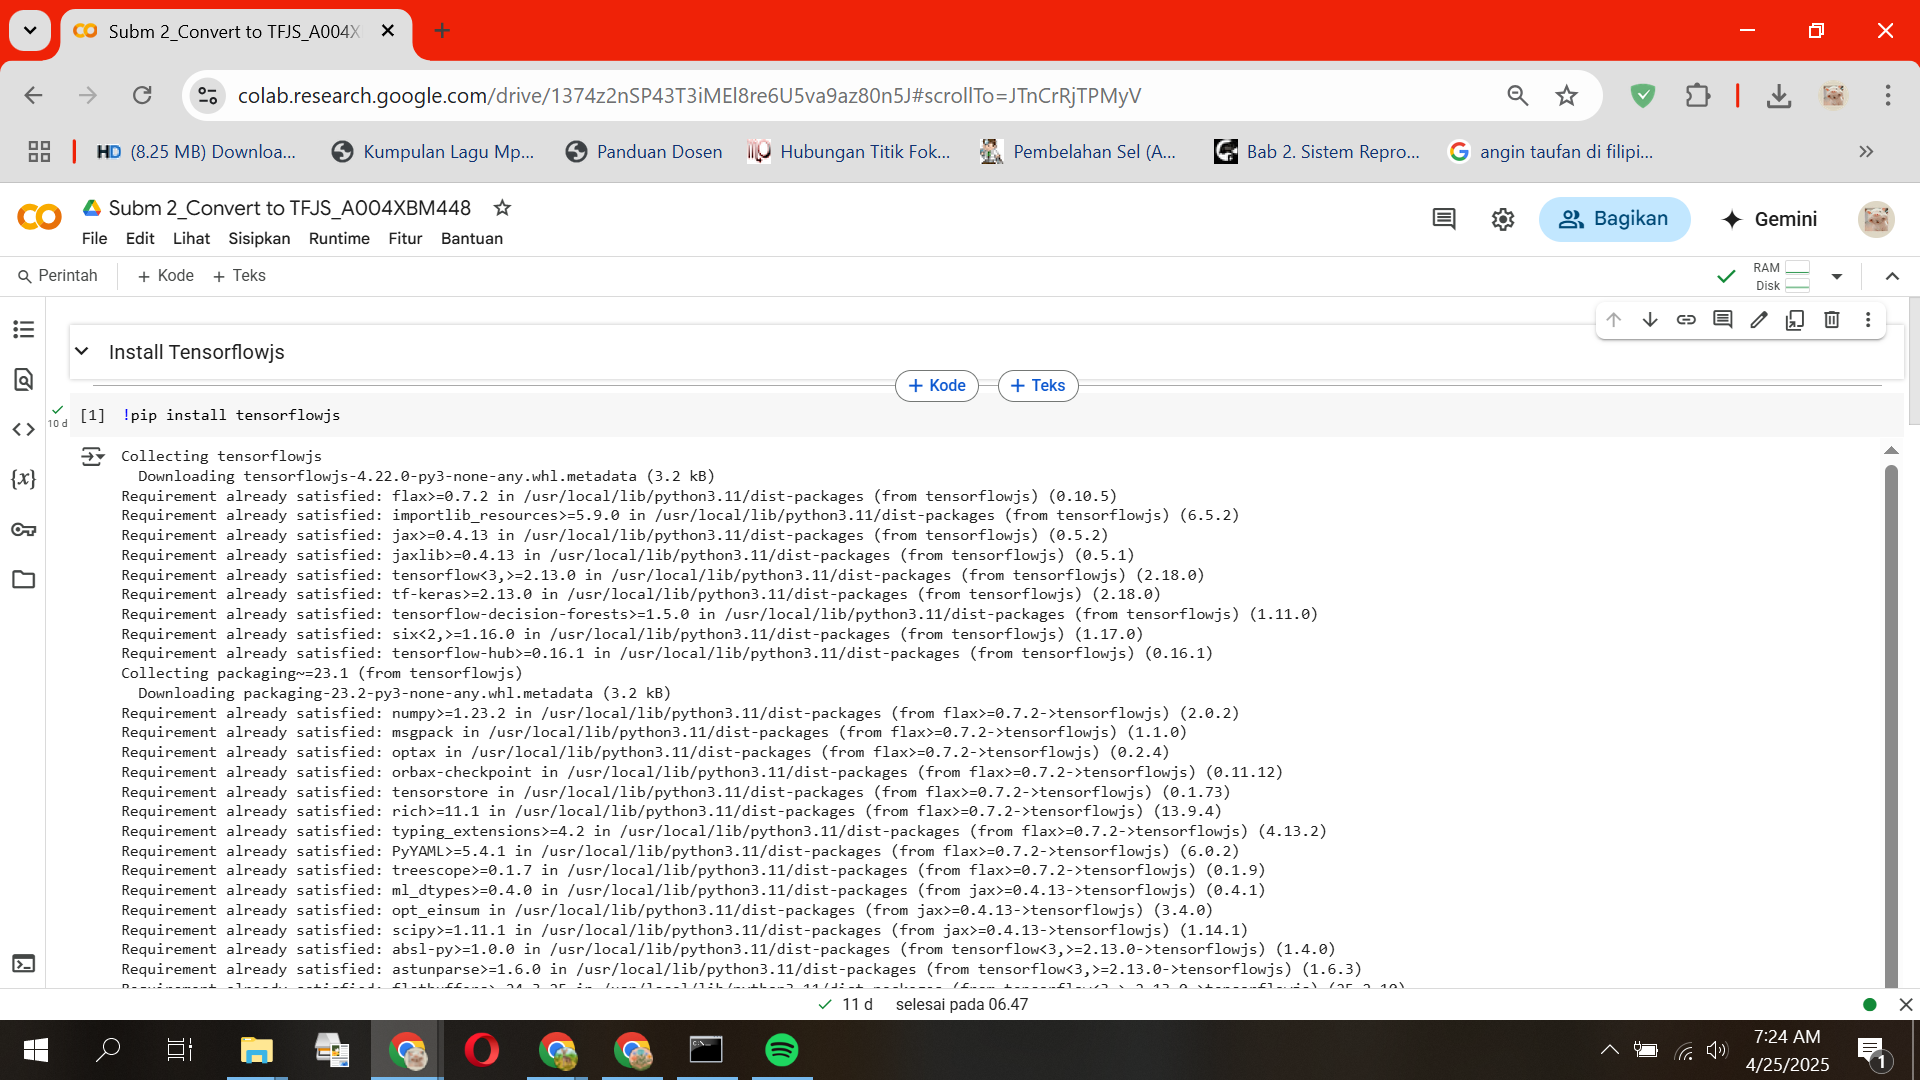
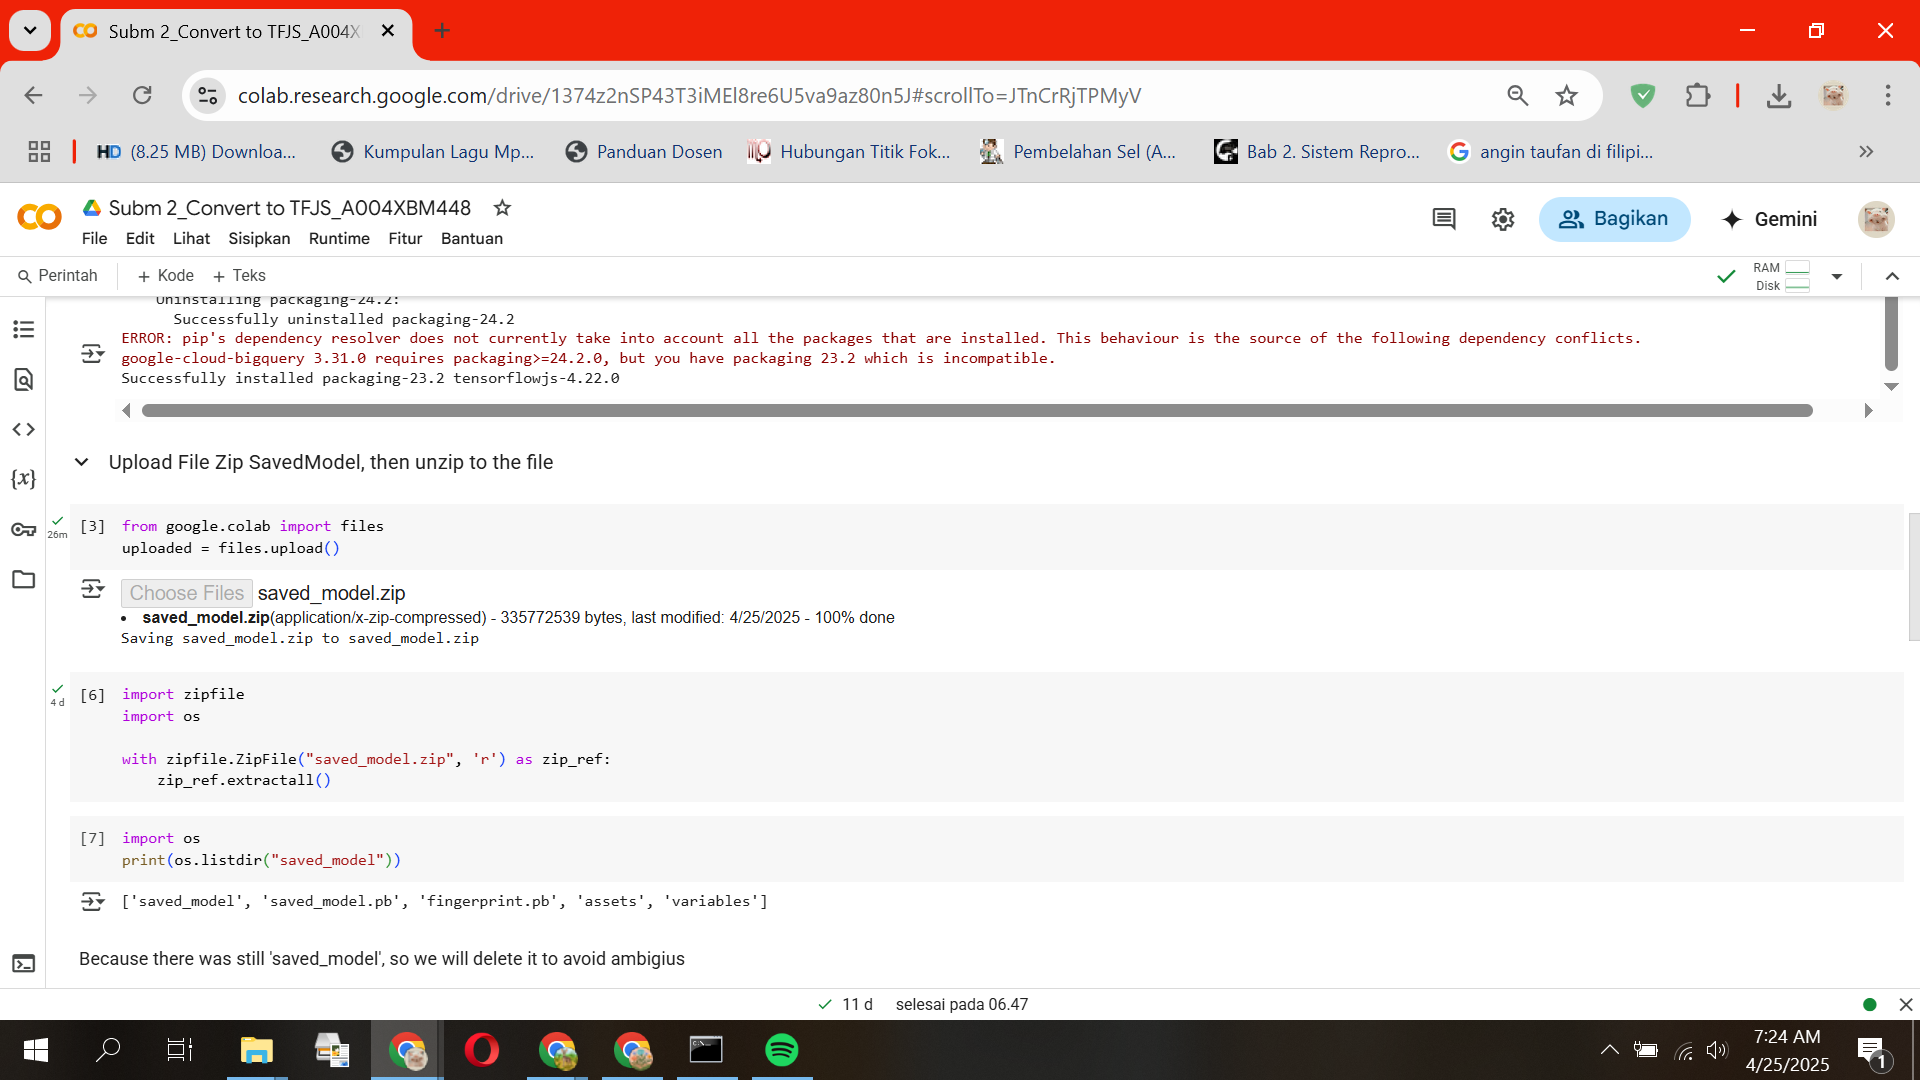
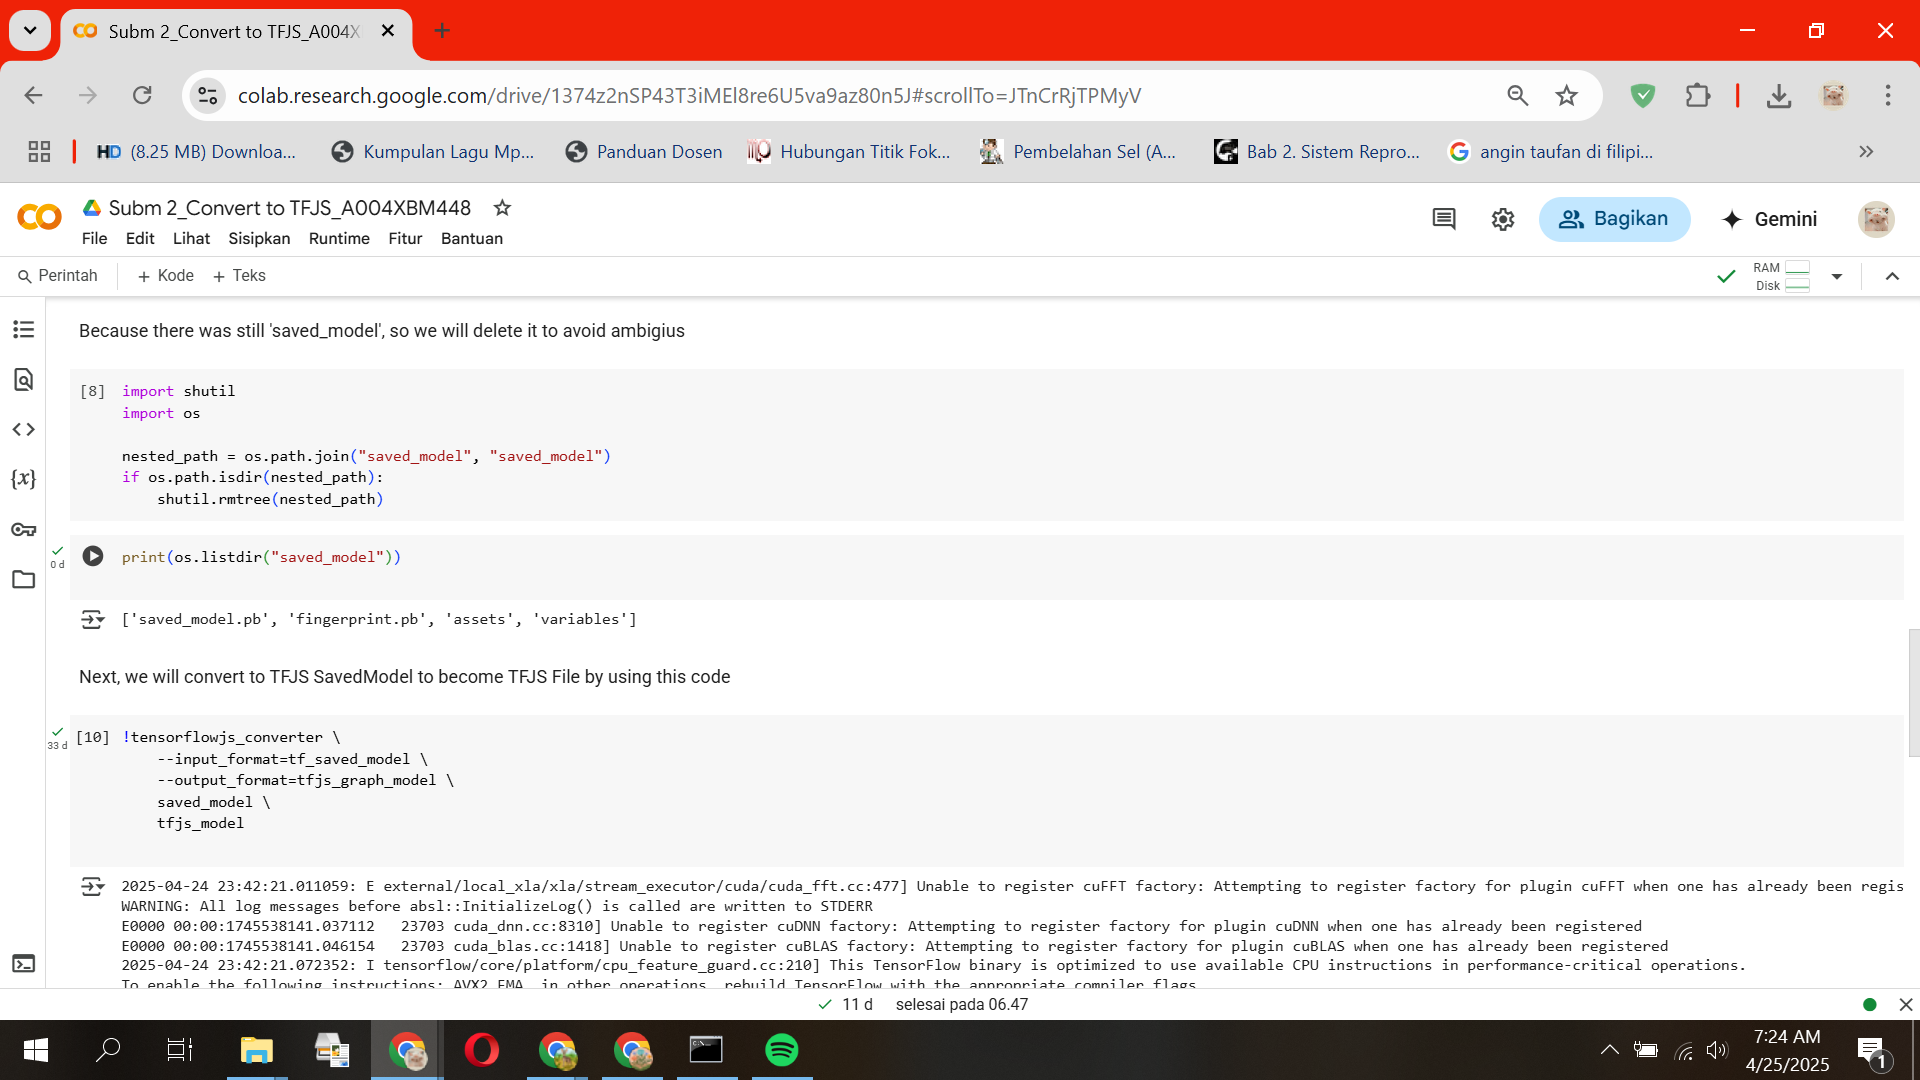
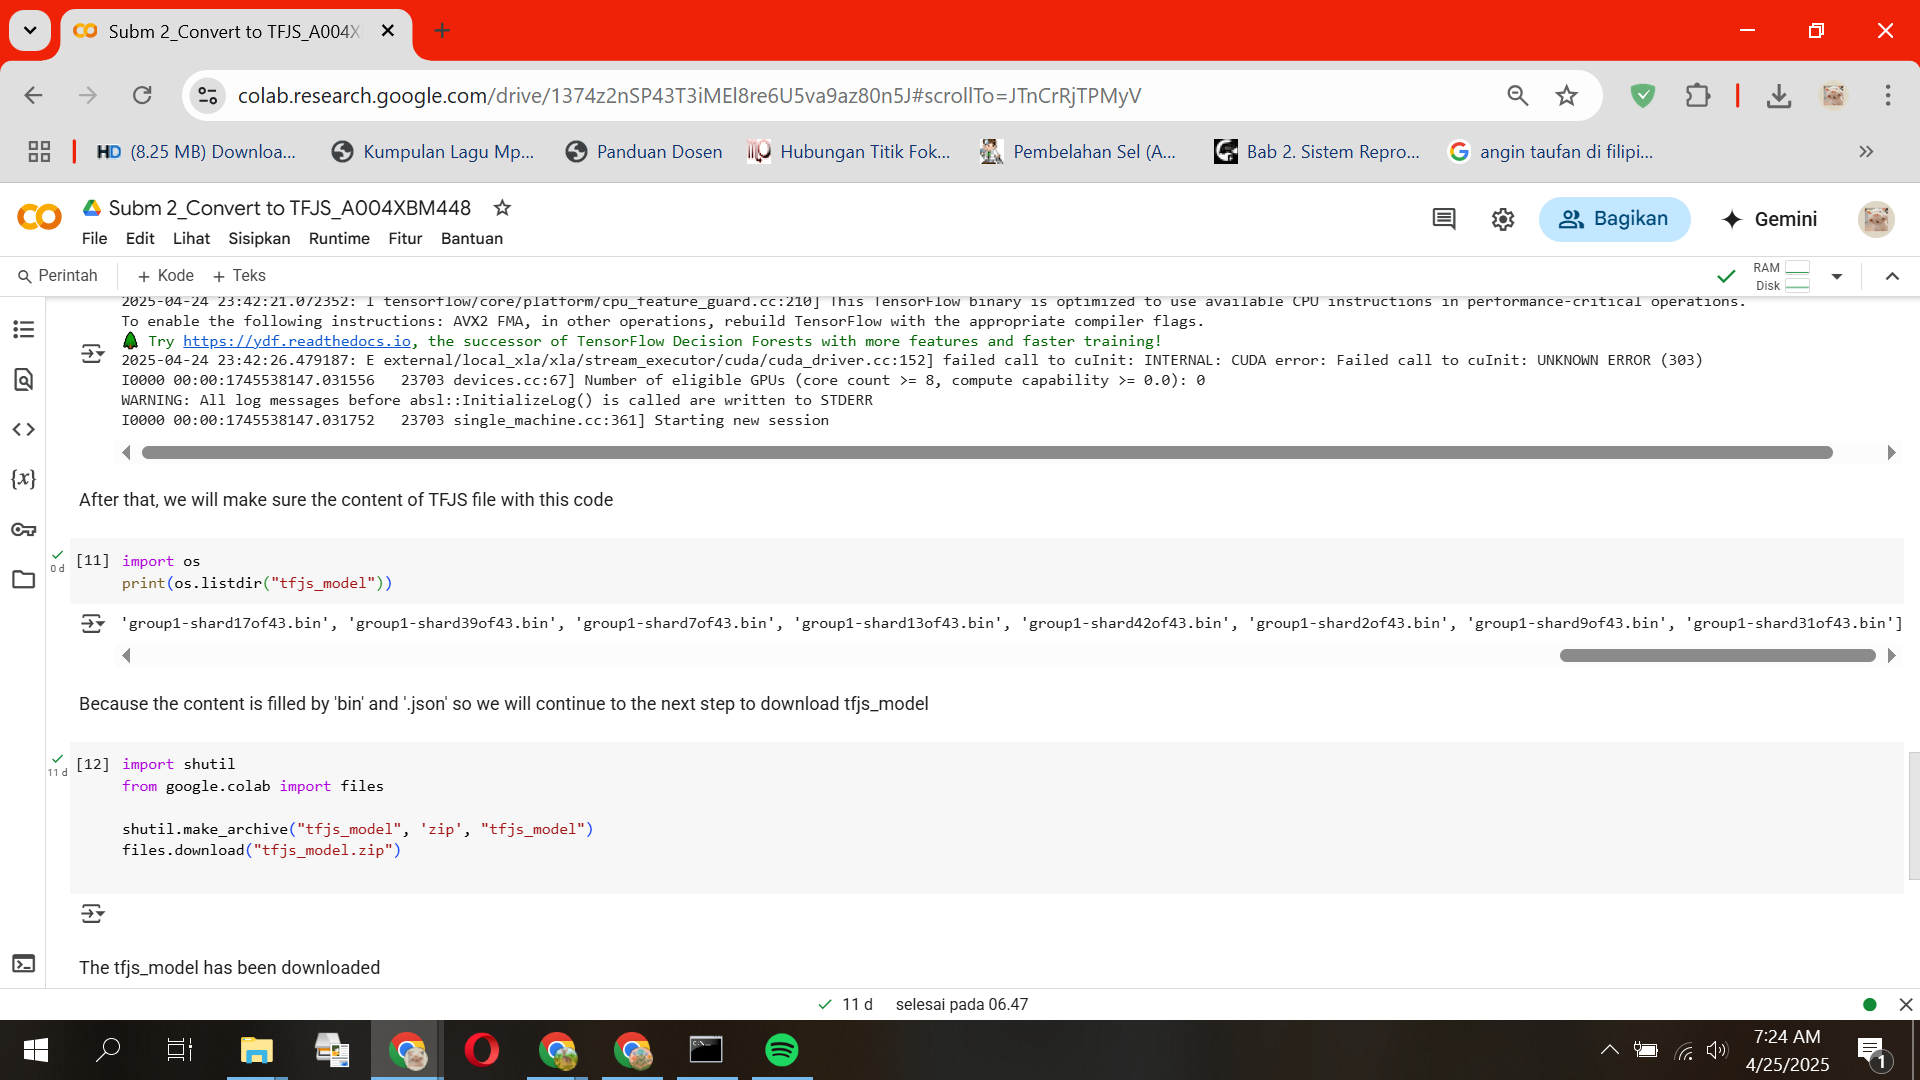

### 🔗 Link Google Colab Process Convert to TFJS 
[Open in Google Colab](https://colab.research.google.com/drive/1374z2nSP43T3iMEl8re6U5va9az80n5J?usp=sharing)

In [ ]:
# ===============================
#  The conversion to TFJS is done in Google Colab, not here.
# ===============================

# **6. Inference**

##  Load Model from Folder SavedModel
Here we will try inference only by using SavedModel. First, we load the model with keras.layers.TFSMLayer because we use Keras 3

In [67]:
# Load SavedModel with tf.saved_model
saved_model_path = r"C:\Users\Windows 10\Studpen_PengembanganML\Submission_2\saved_model"
loaded_model = tf.saved_model.load(saved_model_path)
infer = loaded_model.signatures["serving_default"] 

##  Prepare the Image for Prediction
Next, We loads, processes, and displays a single image from a dataframe (test_df) that contain images for testing models

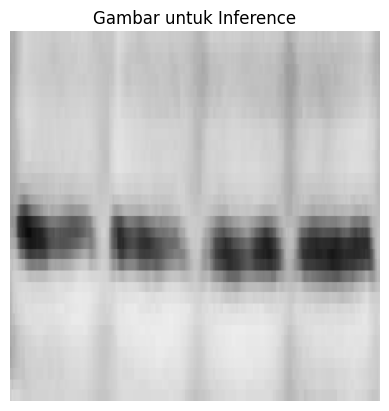

In [68]:
# Take path from test_df
img_path = test_df.iloc[0]["path"]
img_label = test_df.iloc[0]["label"]

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224)) 
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0).astype(np.float32)  

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title("Gambar untuk Inference")
plt.show()

##  Doing Inference
After uploading the image, we will inference the image

In [71]:
# Inference
input_tensor = tf.convert_to_tensor(img_array)
output = infer(input_tensor)

# The output is usually logits or probabilities, after that display them
pred_values = list(output.values())[0].numpy()
predicted_index = np.argmax(pred_values)

print("Predicted class:", predicted_label)
print("Actual label (from test_df):", img_label)

Predicted class: 0
Actual label (from test_df): 0


It can be seen that the model has successfully predicted the image correctly. The displayed image (where the image is grayscale and looks like a gel electrophoresis or barcode pattern) is classified by the model as class 0, and the original label from test_df is also indeed class 0. So, overall, since the prediction result is the same as the original label, it is correct (accurate) and the model works well.